# Decision Tree vs Adaboost

### Load the wine dataset and preprocess the data

In [93]:
#Here we load the wine dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

#We will use two features for this binary classification problem.
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

### Perform an 80/20 train/test split on the dataset with stratification.

In [94]:
# stratify: https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

### Train a DecisionTreeClassifier using the entropy criterion, max_depth = 1, and random_state = 1. Train an AdaBoostClassifier using a tree as the base classifier, with 500 estimators and a learning rate of 0.1.

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
DTclf = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=1)
# Train Decision Tree Classifer
DTclf = DTclf.fit(X_train,y_train)

from sklearn.ensemble import AdaBoostClassifier
ABclf = AdaBoostClassifier(n_estimators=500, base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1), learning_rate=0.1)
ABclf = ABclf.fit(X_train, y_train)

### Test your DecisionTreeClassifier and AdaBoostClassifier on the test set. Print the training and test set accuracies for these two classifiers.

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Decision Tree Train Accuracy:
print("Decision Tree training accuracy: {0:.2f}".format(accuracy_score(y_train, DTclf.predict(X_train))))
#Decision Tree Test Test Accuracy:
predicted_by_DTclf = DTclf.predict(X_test)
print("Decision Tree test accuracy: {0:.2f}".format(accuracy_score(y_test, predicted_by_DTclf)))

#Adaboost Train Accuracy:
print("Adaboost training accuracy: {0:.2f}".format(accuracy_score(y_train, ABclf.predict(X_train))))
#Adaboost Test Accuracy:
predicted_by_ABclf = ABclf.predict(X_test)
print("Adaboost test accuracy: {0:.2f}".format(accuracy_score(y_test, predicted_by_ABclf)))

Decision Tree training accuracy: 0.92
Decision Tree test accuracy: 0.92
Adaboost training accuracy: 1.00
Adaboost test accuracy: 0.96


### Plot the DecisionTreeClassifier and AdaBoostClassifier (i.e., alcohol content vs. OD280/OD315 of dilutes wines and show the class labels).

In [97]:
#define decision region code
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())    

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')



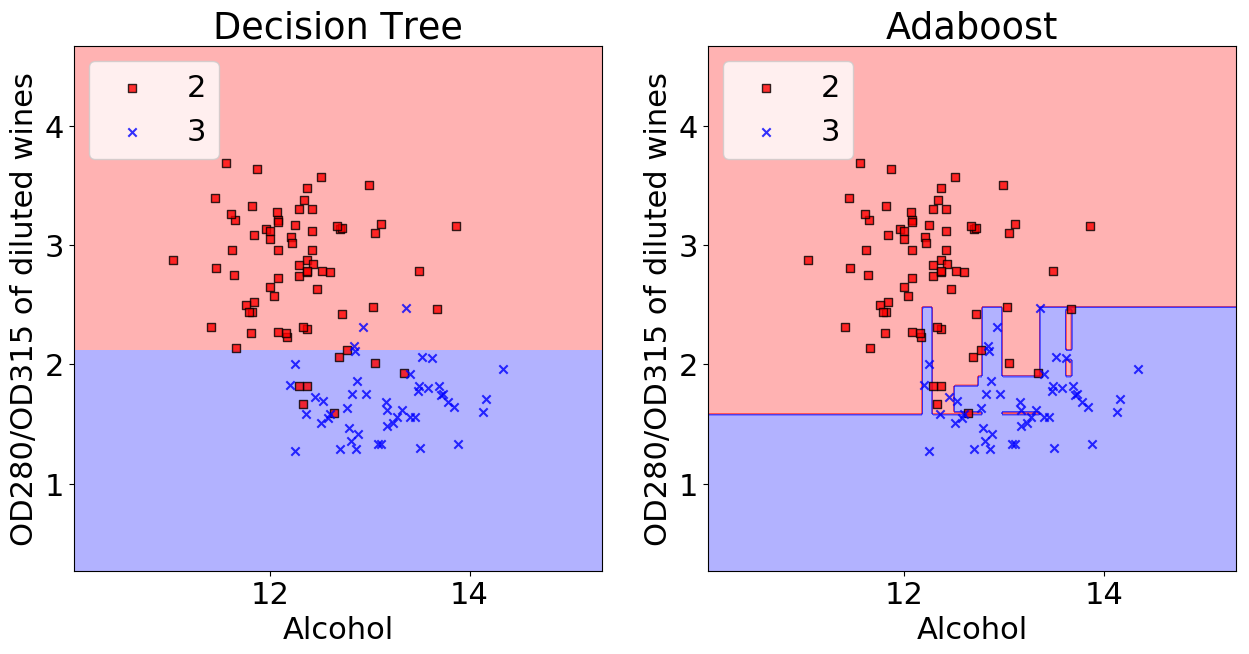

In [98]:
# plotting decision regions
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(15,15))

labels = ['Decision Tree', 'Adaboost']
for clf, lab, grd in zip([DTclf, ABclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X,y, classifier=clf)
    plt.legend(loc='upper left')
    plt.xlabel('Alcohol')
    plt.ylabel('OD280/OD315 of diluted wines')
    plt.rcParams.update({'font.size': 22})
    plt.title(lab)

plt.show()

# Compare K-Means Clustering vs. Hierarchical (agglomerative) clustering and DBSCAN (22 pts total)

Here we will compare three unsupervised clustering algorithms on the make_circles dataset.

### Create the make_circles dataset and visualize it.

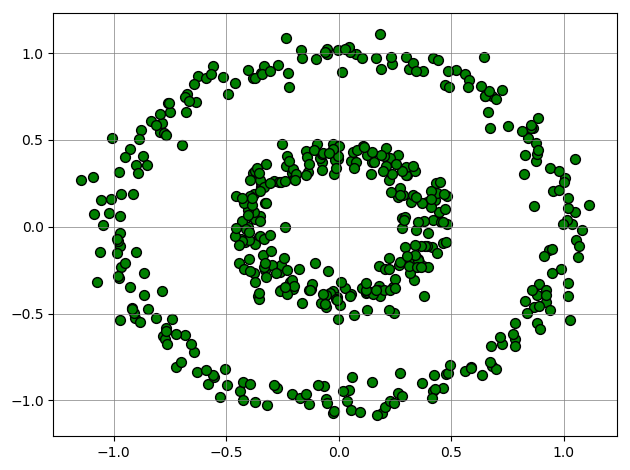

In [108]:
from sklearn.datasets import make_circles
import matplotlib as mpl

np.random.seed(0)
X, y = make_circles(n_samples=500, factor=.4, noise=.06)

df_X = pd.DataFrame(X)
mpl.style.use('default')
plt.scatter(df_X[0], df_X[1], 
            color='g', marker='o', edgecolor='black', s=50)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### Use K-means clustering with two clusters and visualize the results.


Text(0.5,1,'KMeans')

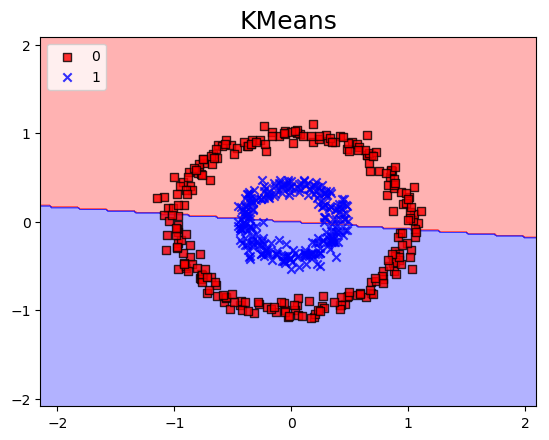

In [109]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit(X,y)  #predict the cluster labels

fig = plot_decision_regions(X,y, classifier=y_km)
plt.legend(loc='upper left')
plt.rcParams.update({'font.size': 15})
plt.title("KMeans")

### Use hierarchical (agglomerative) clustering and compare the performance of the ‘complete linkage’ vs. ‘single linkage’ functions on this dataset. Visualize the results in a scatter plot. Comment on the performance difference.


# <span style="color:red">**I used py file. The code is shown below. Please find the result figure below.**</span>
# Single linkage classified well, but complete linkage failed to do that.


In [ ]:
# (3) Compare K-Means Clustering vs. Hierarchical (agglomerative) clustering and DBSCAN (22 pts total)

#Here we will compare three unsupervised clustering algorithms on the make_circles dataset.

### a. [5 pt] Create the make_circles dataset and visualize it.

from sklearn.datasets import make_circles
import matplotlib as plt
import matplotlib.style
import numpy as np
import pandas as pd

### decision region #####################################################################
#define decision region code
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())    

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
### decision region #####################################################################

np.random.seed(0)
X, y = make_circles(n_samples=500, factor=.4, noise=.06)

### c. [7 pt] Use hierarchical (agglomerative) clustering and compare the performance of the ‘complete linkage’
# vs. ‘single linkage’ functions on this dataset. Visualize the results in a scatter plot. Comment on the performance difference.

from sklearn.cluster import AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ac_single = AgglomerativeClustering(n_clusters=2,
                           linkage='single')
y_ac_single = ac_single.fit_predict(X)
ax1.scatter(X[y_ac_single == 0, 0], X[y_ac_single == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_ac_single == 1, 0], X[y_ac_single == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('Agglomerative clustering, single linkage')
ax1.legend()

ac_complete = AgglomerativeClustering(n_clusters=2,
                           linkage='complete')
y_ac_complete = ac_complete.fit_predict(X);
ax2.scatter(X[y_ac_complete == 0, 0], X[y_ac_complete == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac_complete == 1, 0], X[y_ac_complete == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering, complete linkage')

ax2.legend()
plt.tight_layout()
plt.show()

In [1]:
# relust of single and complete

### Use DBSCAN for comparison and visualize the results. Find a set of parameters (epsilon, min_samples) that are appropriate for this dataset.

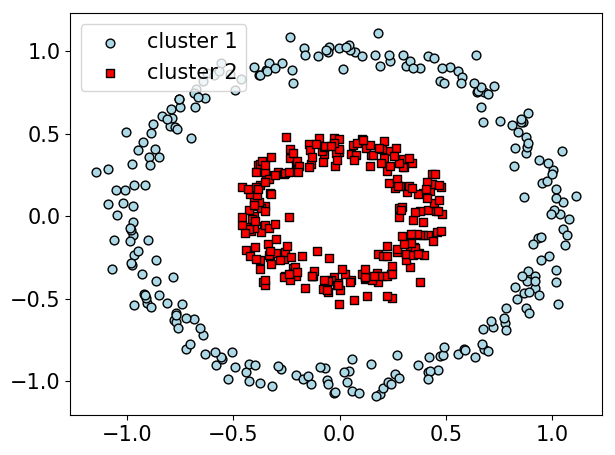

In [112]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

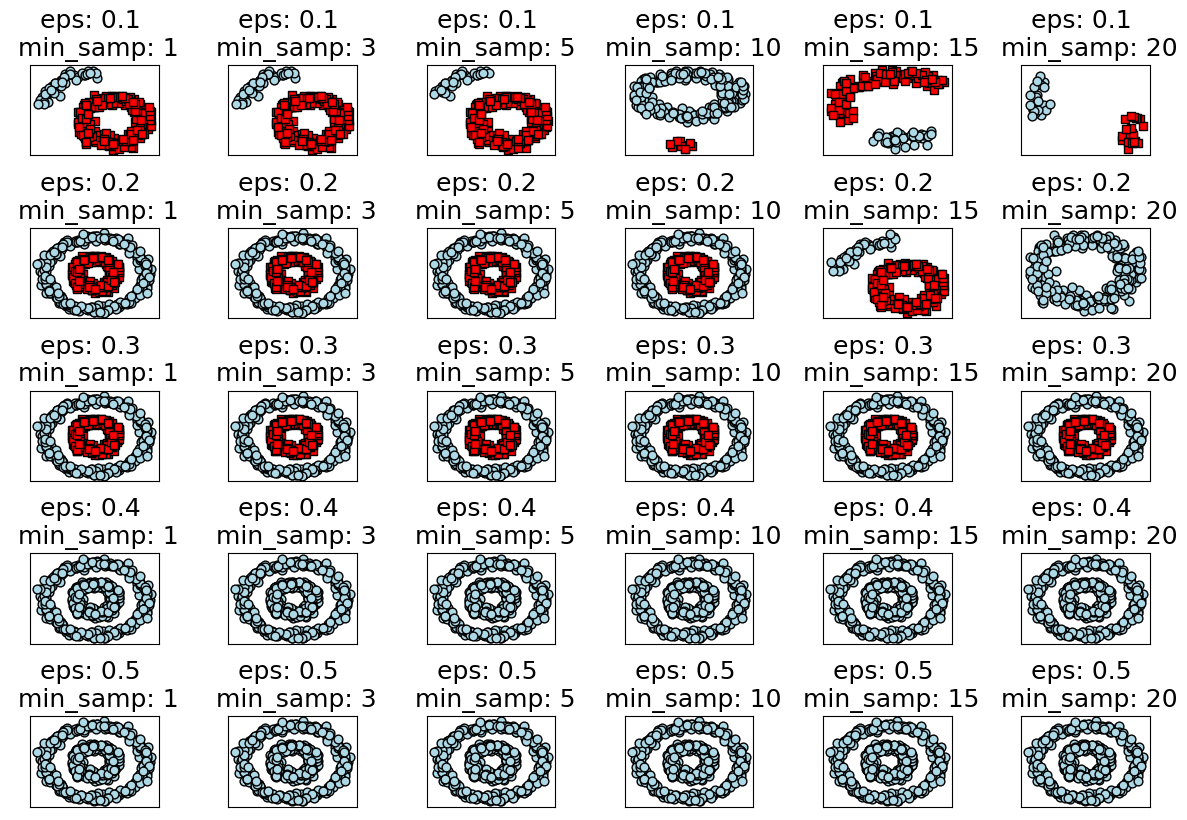

In [150]:
axs_row_list = [0,1,2,3,4]
axs_column_list = [0,1,2,3,4,5]
eps_list = [0.1,0.2,0.3,0.4,0.5]
min_samp_list = [1,3,5,10,15,20]

fig, axs = plt.subplots(5, 6, figsize= (12,8))
fig.tight_layout(pad=0.5)
fig.subplots_adjust(hspace = 0.8)


for axs_row_el in axs_row_list:
    for axs_col_el in axs_column_list:
        db = DBSCAN(eps=eps_list[axs_row_el], min_samples=min_samp_list[axs_col_el], metric='euclidean')
        y_db = db.fit_predict(X)
        axs[axs_row_el, axs_col_el].scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
        axs[axs_row_el, axs_col_el].scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
        axs[axs_row_el, axs_col_el].set_title('eps: {} \n min_samp: {}'.format(eps_list[axs_row_el],min_samp_list[axs_col_el]))
        axs[axs_row_el, axs_col_el].set(xticks=[], yticks=[])
 

## The maximum distance between two samples (eps) has more impact on the model performance than the minimum number of samples.The optimal eps is around 0.2 to 0.3.